# Predict A Doctor's Consultation Fee 

## Data Set Information:

### Problem Statement:

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

## Importing the required libraries:

In [2313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [2314]:
#since it is xlsx file , lets use read_excel method
import pandas as pd
train_dataset = pd.read_excel('Doctor_Final_Train.xlsx')
test_dataset = pd.read_excel('Doctor_Final_Test.xlsx')

In [2315]:
#train dataset
train_dataset.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [2316]:
#test dataset
test_dataset.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [2317]:
train_dataset.shape

(5961, 7)

In train dataset we have 7 columns including Target Variable

In [2318]:
test_dataset.shape

(1987, 6)

In train dataset we have 6 columns excluding Target Variable

### Lets combine these datasets for EDA and data preprocessing

In [2319]:
#lets make temperory column called temp which will show train and test dataset in future.
train_dataset['Temp']="Train"
test_dataset['Temp']="Test"
df = pd.concat([train_dataset,test_dataset],ignore_index=True)
df

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Temp
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train
...,...,...,...,...,...,...,...,...
7943,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,Test
7944,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,Test
7945,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,Test
7946,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,Test


Both the datasets are now combined

## EDA (Exploratory Data Analysis)

In [2320]:
df.shape

(7948, 8)

Now there are 7948 rows and 8 columns

In [2321]:
df.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating', 'Temp'],
      dtype='object')

In [2322]:
df.dtypes

Experience             object
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
Temp                   object
dtype: object

All the columns are object datatype except fee column

In [2323]:
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
Temp                     0
dtype: int64

# Feature Engineering and Data preprocessing

## Lets check all columns one bye one (There are six columns in this dataset excluing fee)

### 1.Experience Column   

In [2324]:
#Lets begin with experience columns by extracting useful information
df.Experience.head()

0    24 years experience
1    12 years experience
2     9 years experience
3    12 years experience
4    20 years experience
Name: Experience, dtype: object

In [2325]:
#lets extract the numberical values from this column
df['Exp'] = df['Experience'].str.replace("years experience", "")

In [2326]:
#Now lets drop experience column, as we have already extracted useful data from it
df.drop(['Experience'],axis = 1, inplace = True)
df.head()

,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Temp,Exp
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train,24
1,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train,12
2,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Train,9
3,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Train,12
4,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train,20


In [2327]:
#now lets convert Experience column from Object to float
df['Exp'] = df['Exp'].astype(float)

In [2328]:
#min value
df['Exp'].min()

0.0

In [2329]:
#max value
df['Exp'].max()

66.0

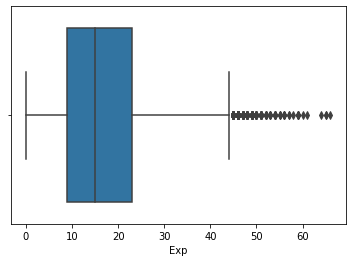

In [2330]:
#Lets check for outliers in this column
sns.boxplot('Exp',data = df)

We cam see there are may outliers present in this column

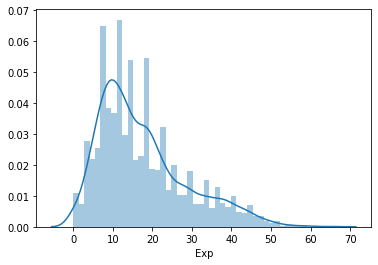

In [2331]:
#Lets check for distribution of this column
sns.distplot(df['Exp'])

We can data almost normal distribued , slightly right skewed

In [2332]:
z_exp = np.abs(zscore(df['Exp']))

In [2333]:
outliers = np.where(z_exp > 3)
outliers

(array([ 105,  110,  183,  325,  372, 1009, 1860, 2023, 2062, 2262, 2281,
        2631, 3180, 3493, 3608, 3960, 4212, 4344, 4775, 5265, 5277, 5410,
        5422, 5587, 5637, 5720, 5807, 6065, 6219, 6225, 6359, 6578, 6602,
        6953, 7207, 7245, 7258, 7298], dtype=int64),)

In [2334]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [2335]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [2336]:
#lets remove outliers in this columm
outliers_IQR3(df,'Exp')

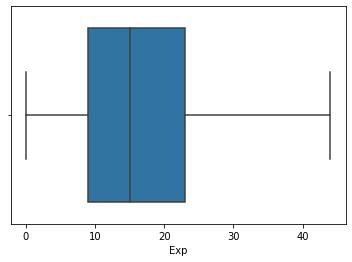

In [2337]:
#Lets check for outliers in this column
sns.boxplot('Exp',data = df)

Outliers have been completely removed

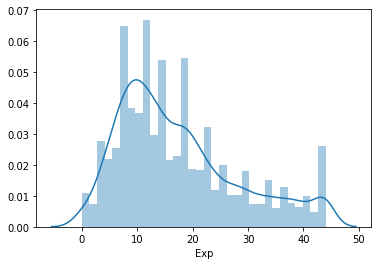

In [2338]:
#Lets check for distribution of this column
sns.distplot(df['Exp'])

In [2339]:
#data is now normal distributed in this column

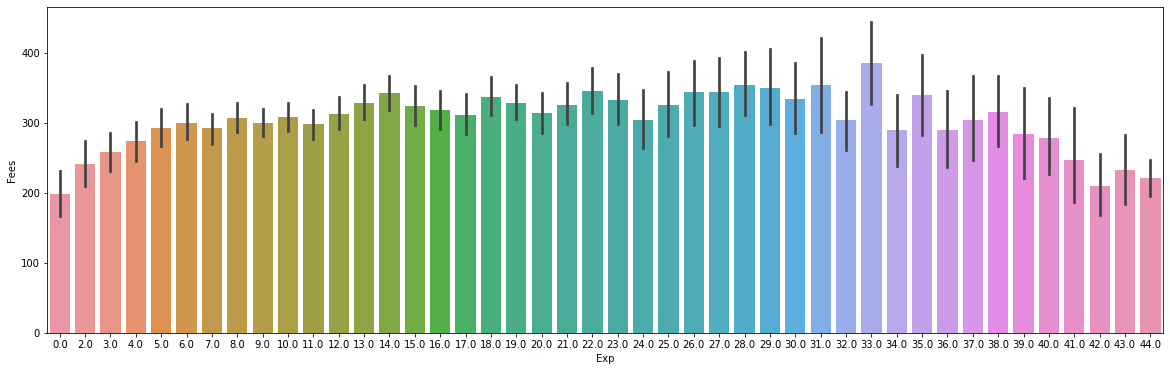

In [2340]:
#lets plot the experience column against our target variable
plt.figure(figsize=(20,6))
sns.barplot(x = df['Exp'],y =df['Fees'])
plt.show()

we can see that as the experienec increases, but after it reaches some threshold by 33 year experience the consultation fee decreses

In [2341]:
#lets check for skewness in this column
df['Exp'].skew()

0.8337670479111088

We have some skewness in this column

In [2342]:
df['Exp'] = power_transform(df['Exp'].values.reshape(-1,1))

In [2343]:
#now the skewness have been reduced
df['Exp'].skew()

-0.010892611400576815

### 2.Miscellaneous_Info column 

In [2344]:
#Lets check Miscellaneous column
#This column cantains Rating and Place column combined
#but we have data for rating and place already
len(df.Miscellaneous_Info.value_counts())

3980

In [2345]:
#we have 3980 diffrenet values in this column,
#and also we already rating column and place column which is already extracted from Miscellaneous_info column
#there is no useful data to predict Target varibale in this column
df.drop(['Miscellaneous_Info'],axis = 1,inplace = True)
df.head()

,Fees,Place,Profile,Qualification,Rating,Temp,Exp
0,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Train,0.735295
1,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Train,-0.345579
2,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Train,-0.709740
3,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Train,-0.345579
4,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100%,Train,0.420608


Now we have removed misscelleneous info column

### 3. Fees column

In [2346]:
#lets get x_test fee , because y_test columns is not provided which is nan values
x_test_fees = df.Fees[:5961]

In [2347]:
#from this rows it is nan values
df.Fees[5962]

nan

In [2348]:
#min
x_test_fees.min()

5.0

In [2349]:
x_test_fees.max()

950.0

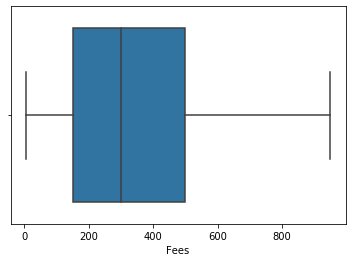

In [2350]:
#Lets check for outliers in this column
sns.boxplot(x_test_fees)

There are no outliers in this target column

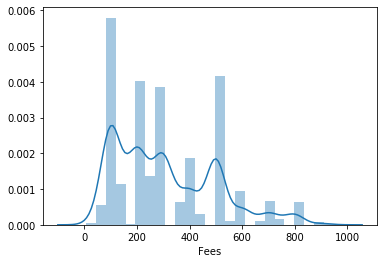

In [2351]:
#Lets check for distribution of this column
sns.distplot(x_test_fees)

Data is also almost normal distributed in this column

### 4.Rating column

In [2352]:
#there are many null values in this column 
df.Rating.isnull().sum()

4392

4392 null values in this column

In [2353]:
#Lets check the datatype of this column
df.Rating.dtype

dtype('O')

It is object datatype

In [2354]:
#lets see this column
df.Rating.head()

0    100%
1     98%
2     NaN
3     NaN
4    100%
Name: Rating, dtype: object

Before we handle missing values, we need to covert this column into int datatype

In [2355]:
#Lets remove "%" symbol from Rating column so we can covert to int type
df['Rating']=df['Rating'].str.strip("%")

In [2356]:
#converting to float datatype
df['Rating'] = df['Rating'].astype(float)

In [2357]:
#now datatype is coverted to float
df.Rating.head()

0    100.0
1     98.0
2      NaN
3      NaN
4    100.0
Name: Rating, dtype: float64

#### Handling Null values in this column

In [2358]:
#lets ckcek the Ratings based on doctor profile
df.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.277108
Dentist             97.698454
Dermatologists      93.446281
ENT Specialist      88.973236
General Medicine    91.944238
Homeopath           96.524496
Name: Rating, dtype: float64

In [2359]:
#Wring a function for filling the missing values using above table
def Null_Ratings(columns):
    Rating = columns[0]
    Profile = columns[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96'
        elif Profile == 'Dentist':
            return '98'
        elif Profile=='Dermatologists':
            return '93'
        elif Profile=='ENT Specialist':
            return '89'
        elif Profile=='General Medicine':
            return '92'
        elif Profile=='Homeopath':
            return '97'
    else:
        return Rating

In [2360]:
df['Rating']=df[['Rating','Profile']].apply(Null_Ratings,axis=1)

In [2361]:
df.Rating

0       100
1        98
2        89
3        96
4       100
       ... 
7943     96
7944     93
7945     92
7946     98
7947     93
Name: Rating, Length: 7948, dtype: object

We can see dtype as object, because in the function we returned string values

In [2362]:
#converting to float datatype
df['Rating'] = df['Rating'].astype(float)

In [2363]:
#now we have all the rows as float datatype
df.Rating.dtype

dtype('float64')

Now we have handled the null values in Ratings column

In [2364]:
#min
df.Rating.min()

7.0

In [2365]:
#max
df.Rating.max()

100.0

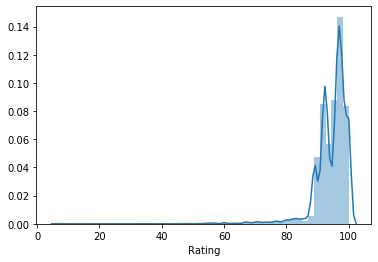

In [2366]:
#Lets check for distribution in this column
sns.distplot(df['Rating'])

Data is very much left skewed

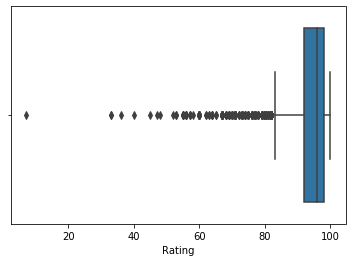

In [2367]:
#Lets check for outliers in this column
sns.boxplot('Rating',data = df)

We can see there are lot of outliers present to the left

In [2368]:
#rating less than 80 is considered as an outlier
df[df['Rating'] <=80].shape

(207, 7)

We almost have 207 outliers among 7900 rows

In [2369]:
#These are the columns with out outliers
df[df['Rating']  >= 80].shape

(7767, 7)

In [2370]:
#Lets Replace the 207 outliers with the whiskers with IQR3 method, since the data is not normal distributed
outliers_IQR3(df,'Rating')

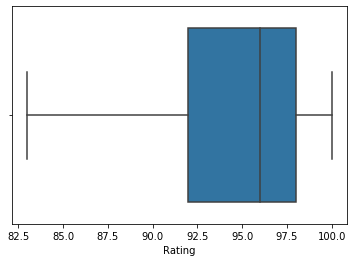

In [2371]:
#Lets check for outliers in this column
sns.boxplot('Rating',data = df)

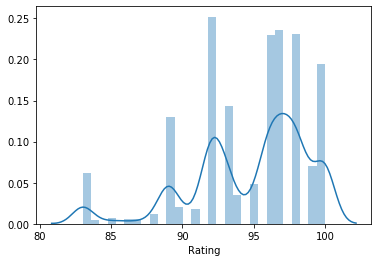

In [2372]:
#Lets check for distribution in this column
sns.distplot(df['Rating'])

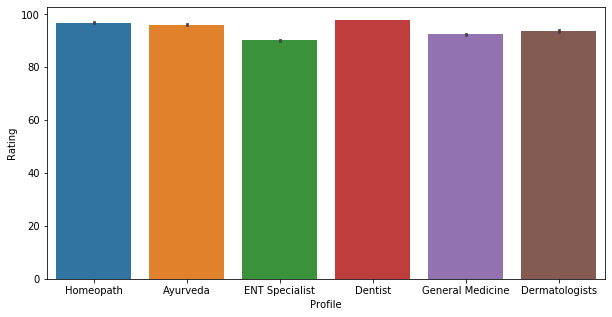

In [2373]:
plt.figure(figsize= (10,5))
sns.barplot(x ='Profile',y = 'Rating' , data = df)
plt.show()

We can see that rating of deentist quite high compared to all, ENT specialist  is low

In [2374]:
#lets check for skewness in this column
df['Rating'].skew()

-0.9324198156824834

we still have some skewness in this column

In [2375]:
#lets reduce the skewness
df['Rating'] = power_transform(df['Rating'].values.reshape(-1,1))

In [2376]:
#skewss has been reduced
df['Rating'].skew()

-0.13650023053123597

### 5.Qualification column

In [2377]:
#In Qualification column we have below details:
#Bachelors  -----> BHMS,BAMS,BDS
#Masters   -----> MD, MS
#profile details  ------> this details we already have in Profile column

In [2378]:
#The only information we can extract from qualification column is :
#if doctor has only Bachelors (BAMS,MBBS)
#or masters MD/MS
#because we already have there profile details in profile column
df.Qualification

0                                BHMS, MD - Homeopathy
1                         BAMS, MD - Ayurveda Medicine
2                       MBBS, MS - Otorhinolaryngology
3                                  BSc - Zoology, BAMS
4                                                 BAMS
                             ...                      
7943                          BAMS, Doctor of Medicine
7944    MD - Dermatology , Venereology & Leprosy, MBBS
7945          MBBS, MD / MS - Obstetrics & Gynaecology
7946                                               BDS
7947    MBBS, MD - Dermatology , Venereology & Leprosy
Name: Qualification, Length: 7948, dtype: object

In [2379]:
Bachelors_list = ['BHMS','BAMS','BDS','BSc','MBBS']   #creating the list of bachelor degrees

Masters_list = ['MD', 'MS', 'MF', 'DNB', 'MDS','DDVL','IBCLC','AFIH','DDV','PGD']  #creating the list of master degrees

df['Masters completed?'] = 'No'  #first lets make everything As "NO"

x = 0 #row number

for i in df.Qualification:
    for j in Masters_list:
        if j in str(i).split():
            df.loc[[x],'Masters completed?'] = 'Yes'
            break
    x += 1

In [2380]:
df.loc[:,['Qualification','Masters completed?']]

,Qualification,Masters completed?
0,"BHMS, MD - Homeopathy",Yes
1,"BAMS, MD - Ayurveda Medicine",Yes
2,"MBBS, MS - Otorhinolaryngology",Yes
3,"BSc - Zoology, BAMS",No
4,BAMS,No
...,...,...
7943,"BAMS, Doctor of Medicine",No
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",Yes
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",Yes
7946,BDS,No


In [2381]:
df["Masters completed?"].value_counts()

Yes    4395
No     3553
Name: Masters completed?, dtype: int64

We have 4395 doctors who have completed masters in this dataframe

And 3553 doctors who has only single bachelors degree

In [2382]:
#now lets drop qualification column as we have extracted the useful data from it
df.drop(['Qualification'],axis = 1,inplace = True)
df.head()

,Fees,Place,Profile,Rating,Temp,Exp,Masters completed?
0,100.0,"Kakkanad, Ernakulam",Homeopath,1.599341,Train,0.735295,Yes
1,350.0,"Whitefield, Bangalore",Ayurveda,0.813166,Train,-0.345579,Yes
2,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,-1.373698,Train,-0.709740,Yes
3,250.0,"Bannerghatta Road, Bangalore",Ayurveda,0.157053,Train,-0.345579,No
4,250.0,"Keelkattalai, Chennai",Ayurveda,1.599341,Train,0.420608,No


In [2383]:
#lets write function to encode this column
def encode(x):
    if x == 'No':
        return 1
    else:
        return 2

In [2384]:
#lets check for mean for fees upon masters completed doctors
df.groupby('Masters completed?')['Fees'].mean()

Masters completed?
No     256.480733
Yes    349.782543
Name: Fees, dtype: float64

We can clearly see that doctors fee is high who have complted masters

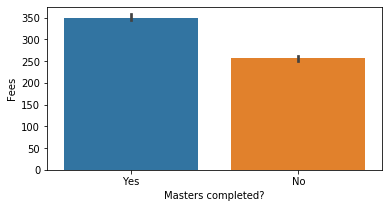

In [2385]:
plt.figure(figsize= (6,3))
sns.barplot(x ='Masters completed?',y = 'Fees' , data = df)
plt.show()

In [2386]:
#Fees is high for masters complted doctors, where as low for not complted doctor

In [2387]:
df['Masters completed?'] = df['Masters completed?'].apply(encode)

In [2388]:
#1 if masters not complted
#2 if masters is completed
df.head()

,Fees,Place,Profile,Rating,Temp,Exp,Masters completed?
0,100.0,"Kakkanad, Ernakulam",Homeopath,1.599341,Train,0.735295,2
1,350.0,"Whitefield, Bangalore",Ayurveda,0.813166,Train,-0.345579,2
2,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,-1.373698,Train,-0.709740,2
3,250.0,"Bannerghatta Road, Bangalore",Ayurveda,0.157053,Train,-0.345579,1
4,250.0,"Keelkattalai, Chennai",Ayurveda,1.599341,Train,0.420608,1


data preprocssing done for Qualification column and useful data is extracted from it

### 6. Place column

In [2389]:
#There 31 missing values in Place column
#df['Place'].fillna()

In [2390]:
df.Place.value_counts()

HSR Layout, Bangalore             97
Andheri West, Mumbai              97
Dwarka, Delhi                     93
Banjara Hills, Hyderabad          85
Mulund West, Mumbai               81
                                  ..
Geeta Colony, Delhi                1
JP Nagar 8 Phase, Bangalore        1
Koramangala 7 Block, Bangalore     1
Cherai, Ernakulam                  1
Nampally, Hyderabad                1
Name: Place, Length: 948, dtype: int64

In [2391]:
len(df.Place.value_counts())

948

There are 948 unique values in Place column

In [2392]:
#lets create the city list where the clinic is located
city_list = ['Bangalore','Chennai','Delhi','Hyderabad','Mumbai'] 

In [2393]:
df.shape

(7948, 7)

In [2394]:
k = 0
for i in df.Place:
    for j in city_list: 
        if j in str(i):
            k += 1
k       

7314

We have 7314 cities out of 7948 with in top 5 cities ['Bangalore','Chennai','Delhi','Hyderabad','Mumbai'] 

These are top 5 cities, lets consider other cities as other

In [2395]:
len(df.Place)

7948

In [2396]:
df['City'] = 'Other'
for i in range(len(df.Place)):
    for j in city_list:
        if j in str(df.loc[i,'Place']):
            df.loc[[i],'City'] = j
            break
            

In [2397]:
df.shape

(7948, 8)

In [2398]:
df.loc[:,['Place','City']]

,Place,City
0,"Kakkanad, Ernakulam",Other
1,"Whitefield, Bangalore",Bangalore
2,"Mathikere - BEL, Bangalore",Bangalore
3,"Bannerghatta Road, Bangalore",Bangalore
4,"Keelkattalai, Chennai",Chennai
...,...,...
7943,"Basavanagudi, Bangalore",Bangalore
7944,"Choolai, Chennai",Chennai
7945,"Porur, Chennai",Chennai
7946,"Arekere, Bangalore",Bangalore


In [2399]:
#now we have extracted the useful information from the place column 
df.City.value_counts() 

Bangalore    1678
Mumbai       1608
Delhi        1602
Hyderabad    1284
Chennai      1142
Other         634
Name: City, dtype: int64

In [2400]:
#lets drop Place column now as we have extracted the useful information
df.drop(['Place'],axis = 1,inplace = True)

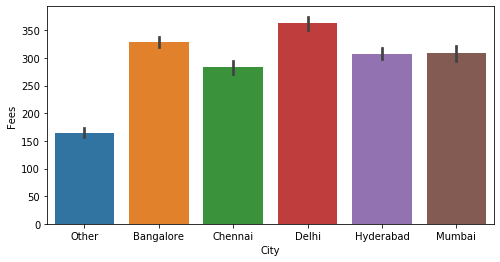

In [2401]:
plt.figure(figsize= (8,4))
sns.barplot(x ='City',y = 'Fees' , data = df)
plt.show()

we can see that fee charged by doctors in delhi is very high

In [2402]:
#Lets check foor the fees of doctors uopn the city they are located
city = df.groupby('City')['Fees'].mean()
city

City
Bangalore    328.842607
Chennai      283.602339
Delhi        362.911392
Hyderabad    307.507886
Mumbai       308.292863
Other        164.695740
Name: Fees, dtype: float64

In [2403]:
#we can see that Delhi city has highest consultation fee compared to other cities

In [2404]:
#lets convert the city column based upon the doctor consultation fee
df['City'] = df['City'].map(city)

In [2405]:
df

,Fees,Profile,Rating,Temp,Exp,Masters completed?,City
0,100.0,Homeopath,1.599341,Train,0.735295,2,164.695740
1,350.0,Ayurveda,0.813166,Train,-0.345579,2,328.842607
2,300.0,ENT Specialist,-1.373698,Train,-0.709740,2,328.842607
3,250.0,Ayurveda,0.157053,Train,-0.345579,1,328.842607
4,250.0,Ayurveda,1.599341,Train,0.420608,1,283.602339
...,...,...,...,...,...,...,...
7943,NaN,Ayurveda,0.157053,Test,-0.581592,1,328.842607
7944,NaN,Dermatologists,-0.625144,Test,-1.515354,2,283.602339
7945,NaN,General Medicine,-0.840308,Test,-0.709740,2,283.602339
7946,NaN,Dentist,0.813166,Test,-0.345579,1,328.842607


In [2406]:
#lets check for skewness in this colum
df.City.skew()

-1.7214661172695094

In [2407]:
#lets reduce the skewness
df['City'] = power_transform(df['City'].values.reshape(-1,1))

In [2408]:
#skewness have been reduced for this column
df['City'].skew()

-0.1208195274334361

In [2409]:
#now we have useful information in this city column

### 7.Profile Column

In [2410]:
#Lets check the doctor profiles in this dataset
df.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [2411]:
#lets group Profile columns by using fee column
profile = df.groupby("Profile")['Fees'].mean()
profile

Profile
Ayurveda            238.968193
Dentist             238.199714
Dermatologists      393.133462
ENT Specialist      387.321429
General Medicine    313.908781
Homeopath           306.499407
Name: Fees, dtype: float64

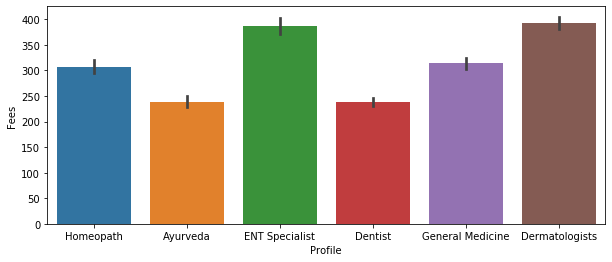

In [2412]:
plt.figure(figsize= (10,4))
sns.barplot(x ='Profile',y = 'Fees' , data = df)
plt.show()

In [2413]:
#we can see that ENT specialist and dermetologuist charge highest fee

In [2414]:
#Lets transform the profile column with useful information
df['Profile'] = df['Profile'].map(profile)

In [2415]:
df.head()

,Fees,Profile,Rating,Temp,Exp,Masters completed?,City
0,100.0,306.499407,1.599341,Train,0.735295,2,-2.154033
1,350.0,238.968193,0.813166,Train,-0.345579,2,0.334021
2,300.0,387.321429,-1.373698,Train,-0.709740,2,0.334021
3,250.0,238.968193,0.157053,Train,-0.345579,1,0.334021
4,250.0,238.968193,1.599341,Train,0.420608,1,-0.819238


In [2416]:
#lets check for skewness in this column

In [2417]:
df.Profile.skew()

0.18893671860083708

In [2418]:
#skewness is in range for this column

In [2419]:
#now all the columns are processed , Lets go model selection phase

In [2420]:
#This is our dataframe after all the data preprocessing
df

,Fees,Profile,Rating,Temp,Exp,Masters completed?,City
0,100.0,306.499407,1.599341,Train,0.735295,2,-2.154033
1,350.0,238.968193,0.813166,Train,-0.345579,2,0.334021
2,300.0,387.321429,-1.373698,Train,-0.709740,2,0.334021
3,250.0,238.968193,0.157053,Train,-0.345579,1,0.334021
4,250.0,238.968193,1.599341,Train,0.420608,1,-0.819238
...,...,...,...,...,...,...,...
7943,NaN,238.968193,0.157053,Test,-0.581592,1,0.334021
7944,NaN,393.133462,-0.625144,Test,-1.515354,2,-0.819238
7945,NaN,313.908781,-0.840308,Test,-0.709740,2,-0.819238
7946,NaN,238.199714,0.813166,Test,-0.345579,1,0.334021


In [2421]:
df.isnull().sum()

Fees                  1987
Profile                  0
Rating                   0
Temp                     0
Exp                      0
Masters completed?       0
City                     0
dtype: int64

Fees column has 1987 null values which is not provided to us

In [2422]:
#lets check the correlation of theses columns  with target vraibale
df.corr()

,Fees,Profile,Rating,Exp,Masters completed?,City
Fees,1.000000,0.323031,-0.131060,0.039845,0.243064,0.244417
Profile,0.323031,1.000000,-0.485037,0.099746,0.341262,0.102947
Rating,-0.131060,-0.485037,1.000000,-0.268763,-0.170498,-0.032167
Exp,0.039845,0.099746,-0.268763,1.000000,0.028540,0.069370
Masters completed?,0.243064,0.341262,-0.170498,0.028540,1.000000,0.046513
City,0.244417,0.102947,-0.032167,0.069370,0.046513,1.000000


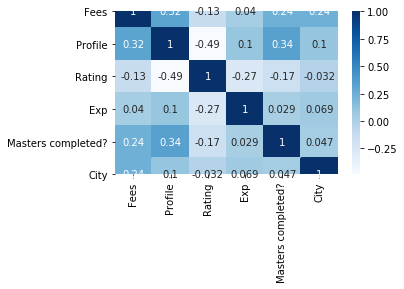

In [2423]:
#correlation
fig = plt.figure(figsize=(5,3))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

We can see that no column is having good correlation with target varibale

In [2424]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['Fees'].sort_values(ascending = False)

Fees                  1.000000
Profile               0.323031
City                  0.244417
Masters completed?    0.243064
Exp                   0.039845
Rating               -0.131060
Name: Fees, dtype: float64

All the columns are having very less correlation with target column

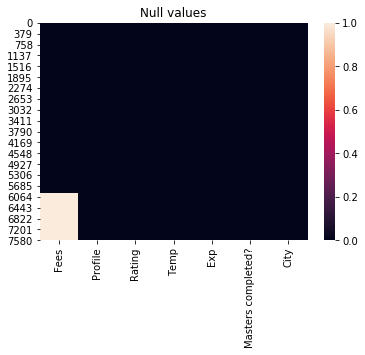

In [2425]:
#checking the missing values with visualization technique
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [2426]:
#we have no null values in any column except Fees column, which (x_test) is not provided to us

## Let split our data

In [2427]:
#Lets split the target variable
Y = df['Fees']
X = df.drop('Fees',axis = 1)

In [2428]:
#Lets get out Original Train and Test Dataset provided in the project
X_train_original = X.loc[df["Temp"] == "Train"]
X_test_original = X.loc[df["Temp"]=="Test"]
#X_train_original.reset_index(drop =True, inplace=True)
#X_test_original.reset_index(drop = True, inplace=True)

In [2429]:
#lets drop the null values in the Y column
Y.dropna(inplace=True)
Y.shape

(5961,)

In [2430]:
#Original X_train dataset
X_train_original.shape

(5961, 6)

In [2431]:
#Original X_test dataset
X_test_original.shape

(1987, 6)

In [2432]:
#no null values in this series
Y.isnull().sum()

0

In [2433]:
# Original X train column from 0th row to 5961th row
X_train_original.drop('Temp',axis = 1,inplace  =True)

In [2434]:
# Original X test column from 5962rd row to the end
X_test_original.drop('Temp',axis = 1,inplace  =True)

In [2435]:
#lets Ignore thes index now
X_train_original.reset_index(drop =True, inplace=True)
X_test_original.reset_index(drop = True, inplace=True)

## We have provided with X_test data, but Y_test (Label) is not provided

So lets use our X_train_original and Y_train_Original  as X and Y for model selection

## Best random state

In [2436]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.20550574322994786 on random state 27


In [2437]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 27


In [2438]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= rand_state )

## Model selection :

In [2439]:
#lets Choose Among this Five Models
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=7)
#ensemble technique
ada = AdaBoostRegressor()


In [2440]:
#checking each model with Cross val score
model_list = [lr,knn,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X_train_original,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = r2_score(y_test,pred)-cvs.mean()
    print('Diffrence between cross val score and r2 score is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.20550574322994786
Cross Val score : 0.1668643385104064
Error :
mean absolute error : 134.96425264735228
mean squared error :  28687.5919992213
root mean squared error : 169.37411844559162
Difference :
Diffrence between cross val score and r2 score is : 0.038641404719541445


KNeighborsRegressor(n_neighbors=7)
Scores :
r2 score: 0.11404511384156846
Cross Val score : 0.09559914168160426
Error :
mean absolute error : 139.2661149825784
mean squared error :  31990.05164260826
root mean squared error : 178.8576295342423
Difference :
Diffrence between cross val score and r2 score is : 0.0184459721599642


AdaBoostRegressor()
Scores :
r2 score: 0.15293786759989048
Cross Val score : 0.15462734056175984
Error :
mean absolute error : 143.4026255837923
mean squared error :  30585.712414177753
root mean squared error : 174.8877137313475
Difference :
Diffrence between cross val score and r2 score is : -0.0016894729618693594


In [2441]:
least_difference

[(LinearRegression(), 0.038641404719541445),
 (KNeighborsRegressor(n_neighbors=7), 0.0184459721599642),
 (AdaBoostRegressor(), -0.0016894729618693594)]

Even though Adaboost has least diffrence,The diffrence is not much For Linear Regression also, lets choose Linaer regression  as our final model since the R2 score quite high compare to Other model

### We can go for hyperparameter tuning and Regularization Linear Regression

## Hyperparameter Tuning

In [2442]:
# lets create the parameter list to pass in GridsearchCv

parameters = {'fit_intercept': [True,False],'normalize' : [True,False],'copy_X' :[True,False],'n_jobs' : list(range(1,11))}
gsv = GridSearchCV(estimator= lr,param_grid=  parameters,cv =5)
gsv.fit(x_train,y_train)
gsv.best_score_

0.15325132691992446

In [2443]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': True}

## Creating a  Linear regression Model:

In [2444]:
final_model = LinearRegression(copy_X= True,fit_intercept= True,n_jobs= 1,normalize=True)
final_model.fit(x_train,y_train)
final_pred = final_model.predict(x_test)
print('Score')
print('R2_score :',r2_score(y_test,final_pred))
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
cvs_final = cross_val_score(final_models,X_train_original,Y,cv =5)
print('Cross Val score :',cvs_final.mean())
print('\n')
print('Difference :')
difference = r2_score(y_test,final_pred)- cvs_final.mean()
print('Diffrence between cross val score and r2 score error is :',difference)

Score
R2_score : 0.20550574322994797


Error :
mean absolute error : 134.96425264735225
mean squared error :  28687.59199922129
Cross Val score : 0.16686433851040633


Difference :
Diffrence between cross val score and r2 score error is : 0.03864140471954164


## Regularization : ElasticNet

In [2445]:
#Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.
from sklearn.linear_model import ElasticNet

In [2446]:
#Hyperparameter tuning for ElasticNet
parameters = {'alpha' : [.0001,.001,.01,.1,1,10],'random_state' : list(range(1,10))}
eln = ElasticNet()
eln_gsv = GridSearchCV(estimator= ls ,param_grid=  parameters,cv =5)
eln_gsv.fit(x_train,y_train)
print(eln_gsv.best_score_)
print(eln_gsv.best_params_)

0.15340318452218193
{'alpha': 1, 'random_state': 1}


In [2447]:
Eln_final = ElasticNet(alpha= 1,random_state=1)
Eln_final.fit(x_train,y_train)
Eln_pred = Eln_final.predict(x_test)
print(r2_score(y_test,Eln_pred))

0.18845767659151835


In [2448]:
#lets check the coffeients of this columns
Eln_final.coef_

array([ 0.8839833 ,  3.41524923,  0.        , 15.64525163, 26.96445308])

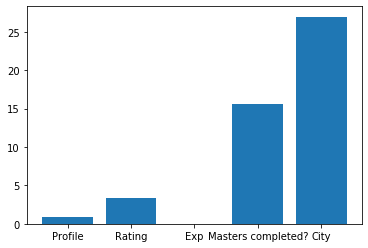

In [2449]:
#we can see that coeffients are very high and very low
plt.bar(X_train_original.columns,Eln_final.coef_)
plt.show()

## creating a ElasticNet model

In [2450]:
final_model = ElasticNet(alpha= 1,random_state=1)
final_model.fit(x_train,y_train)
final_pred = final_model.predict(x_test)
print('Score')
print('R2_score :',r2_score(y_test,final_pred))
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
cvs_final = cross_val_score(final_models,X_train_original,Y,cv =5)
print('Cross Val score :',cvs_final.mean())
print('\n')
print('Difference :')
difference = r2_score(y_test,final_pred)- cvs_final.mean()
print('Diffrence between cross val score and r2 score error is :',difference)

Score
R2_score : 0.18845767659151835


Error :
mean absolute error : 137.17672867923977
mean squared error :  29303.16344726054
Cross Val score : 0.16686433851040633


Difference :
Diffrence between cross val score and r2 score error is : 0.021593338081112023


## Saving the best model

In [2451]:
#using joblib for serialization
import joblib
joblib.dump(final_model,'Doctor_final.obj')

['Doctor_final.obj']

In [2452]:
Doctor_final = joblib.load('Doctor_final.obj')

In [2453]:
pred = Doctor_final.predict(x_test)
r2_score(y_test,pred)

0.18845767659151835

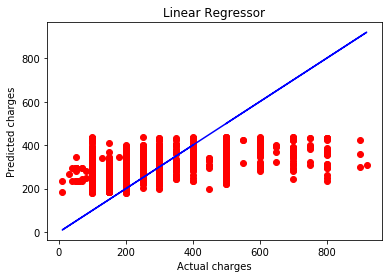

In [2454]:
plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Linear Regressor')
plt.show()

## Now Lets Predict Our Original X_test_original

In [2455]:
final_model.fit(x_train,y_train)
final_pred = final_model.predict(X_test_original)
print(final_pred)

[296.71541911 359.24392706 362.85020815 ... 296.98337417 251.15660528
 367.75150754]


This is the Prediction of our ORIGINAL X_TEST

## conclusion

In [2456]:
conclusion = pd.DataFrame((Doctor_final.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311
Predicted,343.209562,432.505495,360.261698,358.854814,248.975291,260.991347,184.067571,345.283838,374.889179,312.55012,...,282.443847,383.128804,233.875428,184.067571,367.751508,233.330039,360.92909,233.875428,374.889179,295.546649
Actual,500.000000,600.000000,500.000000,100.000000,200.000000,200.000000,200.000000,180.000000,200.000000,300.00000,...,200.000000,100.000000,300.000000,100.000000,200.000000,100.000000,100.00000,100.000000,500.000000,400.000000
